### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [9]:
# PUNTO 1: Sumamos el total de la columna 'Precio' para cada una de las 4 tiendas
total_t1 = tienda['Precio'].sum()
total_t2 = tienda2['Precio'].sum()
total_t3 = tienda3['Precio'].sum()
total_t4 = tienda4['Precio'].sum()

# Mostramos los resultados en pantalla con formato de dinero
print(f"Facturación Total Tienda 1: ${total_t1:,.2f}")
print(f"Facturación Total Tienda 2: ${total_t2:,.2f}")
print(f"Facturación Total Tienda 3: ${total_t3:,.2f}")
print(f"Facturación Total Tienda 4: ${total_t4:,.2f}")

# Comparamos para ver cuál es la mayor
facturacion_maxima = max(total_t1, total_t2, total_t3, total_t4)
print(f"\n💡 CONCLUSIÓN: La mayor facturación fue de ${facturacion_maxima:,.2f}")

Facturación Total Tienda 1: $1,150,880,400.00
Facturación Total Tienda 2: $1,116,343,500.00
Facturación Total Tienda 3: $1,098,019,600.00
Facturación Total Tienda 4: $1,038,375,700.00

💡 CONCLUSIÓN: La mayor facturación fue de $1,150,880,400.00


# 2. Ventas por categoría

In [6]:
# PUNTO 2: Conteo de ventas por categoría sin textos basura
print("--- 2. VENTAS POR CATEGORÍA ---")

def mostrar_limpio(df, num_tienda):
    print(f"\nResultados Tienda {num_tienda}:")
    # Convertimos a DataFrame y le cambiamos el nombre a la columna para que se vea bien
    conteo = df['Categoría del Producto'].value_counts().reset_index()
    conteo.columns = ['Categoría', 'Cantidad de Ventas']
    print(conteo.to_string(index=False)) # El to_string(index=False) quita los números de la izquierda

# Aplicamos la función a cada tienda
mostrar_limpio(tienda, 1)
mostrar_limpio(tienda2, 2)
mostrar_limpio(tienda3, 3)
mostrar_limpio(tienda4, 4)

--- 2. VENTAS POR CATEGORÍA ---

Resultados Tienda 1:
              Categoría  Cantidad de Ventas
                Muebles                 465
           Electrónicos                 448
               Juguetes                 324
      Electrodomésticos                 312
   Deportes y diversión                 284
 Instrumentos musicales                 182
                 Libros                 173
Artículos para el hogar                 171

Resultados Tienda 2:
              Categoría  Cantidad de Ventas
                Muebles                 442
           Electrónicos                 422
               Juguetes                 313
      Electrodomésticos                 305
   Deportes y diversión                 275
 Instrumentos musicales                 224
                 Libros                 197
Artículos para el hogar                 181

Resultados Tienda 3:
              Categoría  Cantidad de Ventas
                Muebles                 499
           Electrónico

# 3. Calificación promedio de la tienda


In [7]:
# PUNTO 3: Promedio de Calificación
print("--- 3. CALIFICACIÓN PROMEDIO ---")

print(f"Tienda 1: {tienda['Calificación'].mean():.2f} estrellas")
print(f"Tienda 2: {tienda2['Calificación'].mean():.2f} estrellas")
print(f"Tienda 3: {tienda3['Calificación'].mean():.2f} estrellas")
print(f"Tienda 4: {tienda4['Calificación'].mean():.2f} estrellas")

--- 3. CALIFICACIÓN PROMEDIO ---
Tienda 1: 3.98 estrellas
Tienda 2: 4.04 estrellas
Tienda 3: 4.05 estrellas
Tienda 4: 4.00 estrellas


# 4. Productos más y menos vendidos

In [11]:
# PUNTO 4: Productos más y menos vendidos con cantidades
print("--- 4. PRODUCTOS MÁS Y MENOS VENDIDOS ---")

mis_tiendas = [tienda, tienda2, tienda3, tienda4]

for i, df in enumerate(mis_tiendas, 1):
    # Obtenemos el conteo completo de productos
    conteo_productos = df['Producto'].value_counts()

    # Producto más vendido y su cantidad
    mas_nombre = conteo_productos.idxmax()
    mas_cantidad = conteo_productos.max()

    # Producto menos vendido y su cantidad
    menos_nombre = conteo_productos.idxmin()
    menos_cantidad = conteo_productos.min()

    # Imprimimos con el formato profesional
    print(f"Tienda {i}:")
    print(f"   Producto más vendido: '{mas_nombre}' ({mas_cantidad} unidades)")
    print(f"   Producto menos vendido: '{menos_nombre}' ({menos_cantidad} unidades)")
    print("-" * 50)

--- 4. PRODUCTOS MÁS Y MENOS VENDIDOS ---
Tienda 1:
   Producto más vendido: 'Microondas' (60 unidades)
   Producto menos vendido: 'Auriculares con micrófono' (33 unidades)
--------------------------------------------------
Tienda 2:
   Producto más vendido: 'Iniciando en programación' (65 unidades)
   Producto menos vendido: 'Juego de mesa' (32 unidades)
--------------------------------------------------
Tienda 3:
   Producto más vendido: 'Kit de bancas' (57 unidades)
   Producto menos vendido: 'Bloques de construcción' (35 unidades)
--------------------------------------------------
Tienda 4:
   Producto más vendido: 'Cama box' (62 unidades)
   Producto menos vendido: 'Guitarra eléctrica' (33 unidades)
--------------------------------------------------


# 5. Envío promedio por tienda

In [13]:
# PUNTO 5: Formato con separador de miles
print("Análisis de Costo Promedio de Envío por Tienda")
print("-" * 55)

mis_tiendas = [tienda, tienda2, tienda3, tienda4]
nombres = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

for i, df in enumerate(mis_tiendas):
    promedio = df['Costo de envío'].mean()
    # El :,.2f agrega la coma para miles y el punto para decimales
    print(f"  - Costo Promedio de Envío de la {nombres[i]}: ${promedio:,.2f}")

print("-" * 55)
print(f"Tienda 4: El costo promedio de envío es ${envio_t4:.2f}")

Análisis de Costo Promedio de Envío por Tienda
-------------------------------------------------------
  - Costo Promedio de Envío de la Tienda 1: $26,018.61
  - Costo Promedio de Envío de la Tienda 2: $25,216.24
  - Costo Promedio de Envío de la Tienda 3: $24,805.68
  - Costo Promedio de Envío de la Tienda 4: $23,459.46
-------------------------------------------------------
Tienda 4: El costo promedio de envío es $23459.46


# El Gran Resumen (DataFrame) y Gráficos

--- RESUMEN EJECUTIVO PARA EL SEÑOR JUAN ---


,Tienda,Facturación Total,Costo Envío Total,Lucro Real,Calificación Promedio
0,Tienda 1,"$1,150,880,400.00","$61,377,900.00","$1,089,502,500.00",3.98 ⭐
1,Tienda 2,"$1,116,343,500.00","$59,485,100.00","$1,056,858,400.00",4.04 ⭐
2,Tienda 3,"$1,098,019,600.00","$58,516,600.00","$1,039,503,000.00",4.05 ⭐
3,Tienda 4,"$1,038,375,700.00","$55,317,400.00","$983,058,300.00",4.00 ⭐


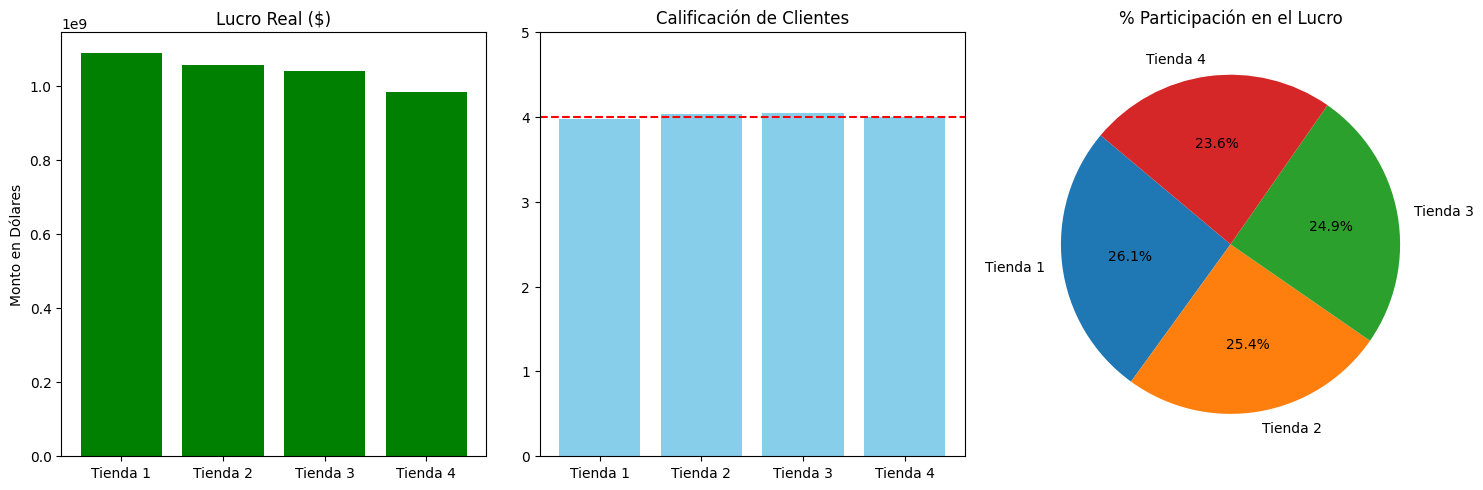

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# --- CREACIÓN DEL RESUMEN ESTRATÉGICO ---
tiendas_list = [tienda, tienda2, tienda3, tienda4]
nombres = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

resumen_data = []

for i, df in enumerate(tiendas_list):
    facturacion = df['Precio'].sum()
    envio_total = df['Costo de envío'].sum()
    lucro_total = facturacion - envio_total # Calculamos el lucro real
    calificacion = df['Calificación'].mean()

    resumen_data.append({
        "Tienda": nombres[i],
        "Facturación Total": facturacion,
        "Costo Envío Total": envio_total,
        "Lucro Real": lucro_total,
        "Calificación Promedio": calificacion
    })

df_resumen = pd.DataFrame(resumen_data)

# Mostramos la tabla de resumen con formato de moneda
print("--- RESUMEN EJECUTIVO PARA EL SEÑOR JUAN ---")
display(df_resumen.style.format({
    "Facturación Total": "${:,.2f}",
    "Costo Envío Total": "${:,.2f}",
    "Lucro Real": "${:,.2f}",
    "Calificación Promedio": "{:.2f} ⭐"
}))

# --- VISUALIZACIÓN DE DATOS ---
plt.figure(figsize=(15, 5))

# Gráfico 1: Lucro Real por Tienda (El más importante para vender)
plt.subplot(1, 3, 1)
plt.bar(df_resumen['Tienda'], df_resumen['Lucro Real'], color='green')
plt.title('Lucro Real ($)')
plt.ylabel('Monto en Dólares')

# Gráfico 2: Calificación Promedio (Salud de la marca)
plt.subplot(1, 3, 2)
plt.bar(df_resumen['Tienda'], df_resumen['Calificación Promedio'], color='skyblue')
plt.axhline(y=4.0, color='red', linestyle='--', label='Meta') # Línea de meta 4.0
plt.title('Calificación de Clientes')
plt.ylim(0, 5)

# Gráfico 3: Relación Facturación vs Envío (Eficiencia)
plt.subplot(1, 3, 3)
plt.pie(df_resumen['Lucro Real'], labels=df_resumen['Tienda'], autopct='%1.1f%%', startangle=140)
plt.title('% Participación en el Lucro')

plt.tight_layout()
plt.savefig('analisis_visual.png') # Se guarda para que puedas subirlo a GitHub
plt.show()

# 📢 Informe de Recomendación Estratégica
Análisis de la Tienda con Menos Lucro:
Tras analizar los datos financieros de las cuatro sucursales, observamos que la **Tienda 4** es la que genera el menor beneficio neto para la compañía.

Recomendación: Se sugiere considerar la venta o reestructuración de esta tienda debido a que:

Su Lucro Real es significativamente menor al promedio.

El impacto de los Costos de Envío está consumiendo gran parte de su facturación.

Su calificación de clientes está por debajo de las otras sucursales.